# Python performance tips

## A relatable problem: multivariate linear regression

In [1]:
import pandas as pd

test_dataset = pd.read_csv("test_regression.csv", index_col=0 )
test_dataset

attribute0  attribute1  attribute2  attribute3  attribute4  \
person0              77          47           8          94          95   
person1              64          61          92          38          21   
person2              92          16           1          66          43   
person3              34          57          50          68          97   
person4              92          59           6          96          80   
...                 ...         ...         ...         ...         ...   
person99995          50          73          25          29          85   
person99996          21          63          92          71           4   
person99997          65          44          47           7          59   
person99998          57          19          58          88          96   
person99999          39          65          70           5          54   

             attribute5  attribute6  attribute7  attribute8  attribute9  ...  \
person0              19          50          84          44           5  ...   
person1              11          86          66          15           3  ...   
person2              68          90          55          22          84  ...   
person3              32          67          41          51          39  ...   
person4              93           2          25          64          16  ...   
...                 ...         ...         ...         ...         ...  ...   
person99995           8          22          53          43           2  ...   
person99996          40          19          24          19          81  ...   
person99997          10          51          77          59          61  ...   
person99998          21          80          29          90          17  ...   
person99999          76          92          93          80          13  ...   

             attribute190  attribute191  attribute192  attribute193  \
person0                73            92            59            36   
person1                89            35            67            88   
person2                65            82            37            54   
person3                82            22            25            69   
person4                55            37            39            63   
...                   ...           ...           ...           ...   
person99995            89            72            60            74   
person99996            79            48            73            81   
person99997            41            89             6            31   
person99998            93            70            22            12   
person99999            28            12            97            98   

             attribute194  attribute195  attribute196  attribute197  \
person0                24            21            87            47   
person1                51            92            89            32   
person2                39            70            81            80   
person3                72            23            42            80   
person4                63            16            80            10   
...                   ...           ...           ...           ...   
person99995            32            85            18            84   
person99996            73            56            44            74   
person99997            48            10            78            98   
person99998             4            87            64            20   
person99999            99            83            79            28   

             attribute198  attribute199  
person0                10            97  
person1                50            20  
person2                73            52  
person3                24            95  
person4                40            34  
...                   ...           ...  
person99995            31            79  
person99996            82            33  
person99997            91            56  
person99998             6

## The key points I want to cover


<div style="text-align:left;"><img style="width:1000px" src="tips.png"></div>

## Naive solution

In [16]:
def naive_solution(test_dataset):
    from sklearn.linear_model import LinearRegression

    reg = LinearRegression().fit(test_dataset[test_dataset.columns[1:]].values,test_dataset['attribute0'].values)
    print(reg.coef_.transpose(), reg.intercept_) #each coeff is for a different variant
    

## Benchmark first!

In [17]:
%load_ext line_profiler

%lprun -f naive_solution naive_solution(test_dataset=test_dataset)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
[ 3.28216245e-03  4.11317829e-03  3.37364398e-04  2.64243273e-03
  2.17797446e-03 -3.02509420e-05  2.32733642e-03 -8.61172042e-03
 -1.36643037e-03 -8.95795961e-04 -2.44912186e-03  1.73254477e-03
  8.43843704e-04  4.61680635e-03  4.81514575e-03 -9.58700749e-04
 -7.89527360e-04  1.39680868e-04  2.11507862e-03  5.17403384e-03
  2.85495841e-03  1.60353983e-03  1.24611504e-04  2.08647781e-03
 -8.15363512e-03  2.28945885e-03  2.81360779e-03  6.51814738e-04
  7.18648344e-03 -4.34292699e-03  4.84728213e-03  1.30551803e-03
 -6.30699984e-04  1.90467594e-03  4.45083714e-03  1.18127432e-03
  1.66634542e-04  2.53038814e-03  2.58366598e-03  2.08709284e-03
 -2.98975023e-03  4.08687141e-03 -1.09463039e-03 -2.26038850e-03
 -1.55741041e-03  6.64800925e-04  4.25462343e-03  1.52890727e-03
  8.02851090e-05  4.84102006e-03  7.47765595e-03 -4.52007191e-03
 -4.81179904e-03  2.55530882e-03  9.36677274e-04 -1.30484577e

## Easy parallelization

In [ ]:
input_data = test_dataset.to_dict()

ingenes = tqdm(genes2process)
processed_list = Parallel(n_jobs=4)(delayed(calc_gene)(gene,inputs[gene]) for gene in ingenes)

## Rewrite the heavier parts in C/C++

## Use the GPU instead

## SIMD - Single Instruction Multiple Data

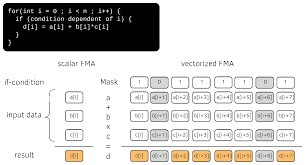

In [15]:
from IPython.display import Image
Image(filename='vect.png',width = 600, height = 300)

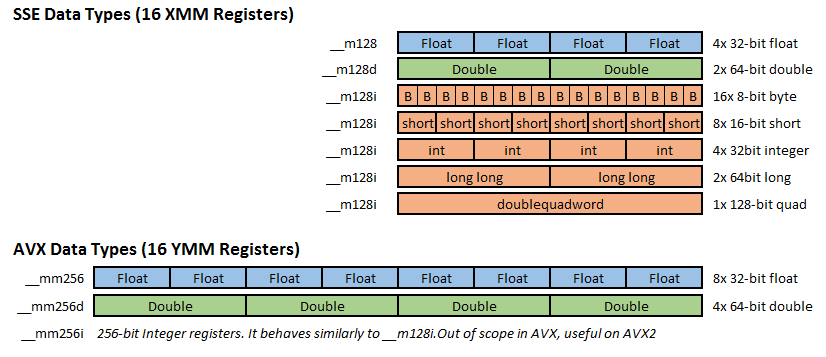

In [14]:
Image(filename='sse.png',width = 600, height = 300)

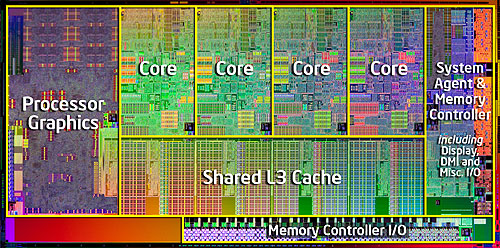

In [9]:
from IPython.display import Image
Image(filename='SandyBridgeDieMap.jpg',width = 600, height = 300)

In [1]:
!lscpu

Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Byte Order:                      Little Endian
Address sizes:                   36 bits physical, 48 bits virtual
CPU(s):                          4
On-line CPU(s) list:             0-3
Thread(s) per core:              1
Core(s) per socket:              4
Socket(s):                       1
NUMA node(s):                    1
Vendor ID:                       GenuineIntel
CPU family:                      6
Model:                           42
Model name:                      Intel(R) Core(TM) i5-2400 CPU @ 3.10GHz
Stepping:                        7
CPU MHz:                         2576.227
CPU max MHz:                     3400.0000
CPU min MHz:                     1600.0000
BogoMIPS:                        6185.58
Virtualization:                  VT-x
L1d cache:                       128 KiB
L1i cache:                       128 KiB
L2 cache:                        1 MiB
L3 cache:                        

 ### From the Numpy source code on Github:

In [1]:
import random
import pandas as pd

people = []
f = pd.DataFrame()
for i in range(100000):
    
    people.append("person" + str(i))
    
for i in range(200):
    
    print("Done with loop " + str(i), end='\r')
    f["attribute" + str(i)] = [random.randint(1, 99) for _ in range(100000)]
    
f.index = people
f.to_csv("test_regression.csv")


In [ ]:
from IPython.display import Image
Image(filename='SandyBridgeDieMap.jpg')

In [ ]:
from IPython.display import Image
Image(filename='')